C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

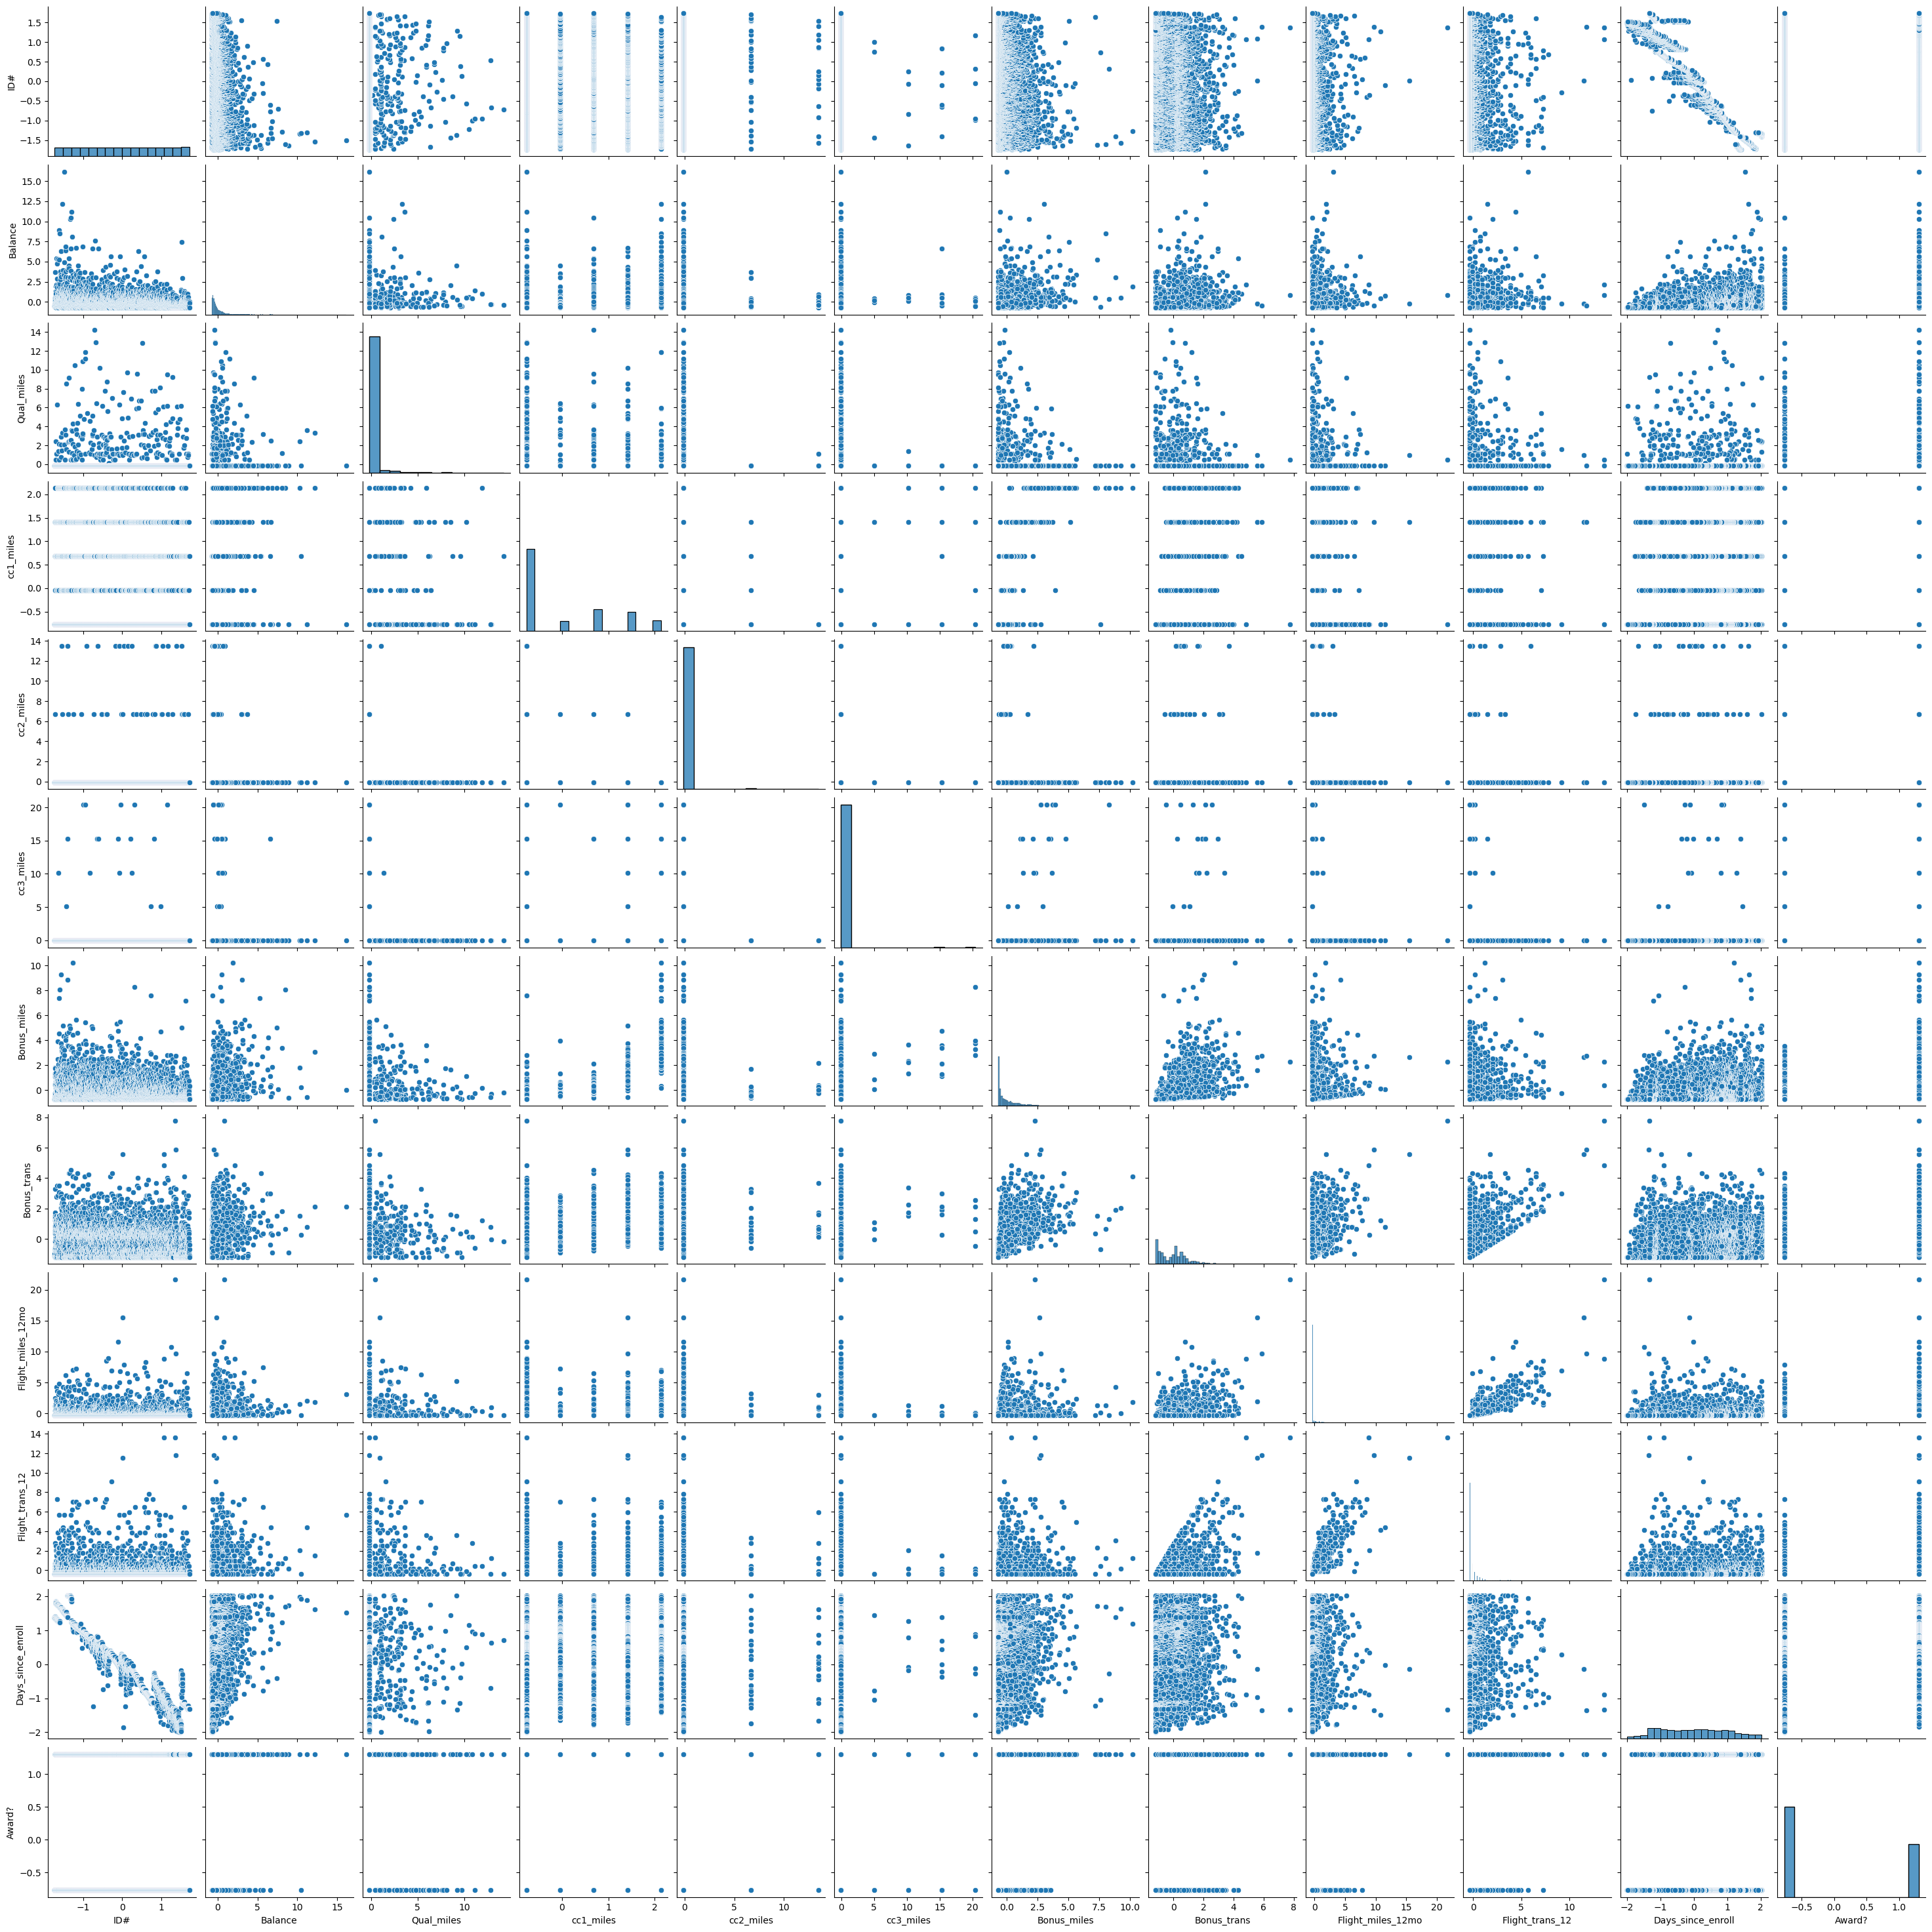

K-Means Clusters:
                        ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                 
0               2327.116832   42243.643168   91.124356   1.245941   1.019406   
1               1445.633588  119557.722901  165.557252   3.612214   1.002290   
2               1753.128049  189304.225610  788.689024   2.182927   1.036585   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                1.000000   4896.419802     6.987723         194.355248   
1                1.037405  38921.206870    18.553435         351.196947   
2                1.000000  31780.481707    27.115854        5420.414634   

                Flight_trans_12  Days_since_enroll    Award?  \
KMeans_Cluster                                                 
0                      0.598812        3549.788911  0.203564   
1            

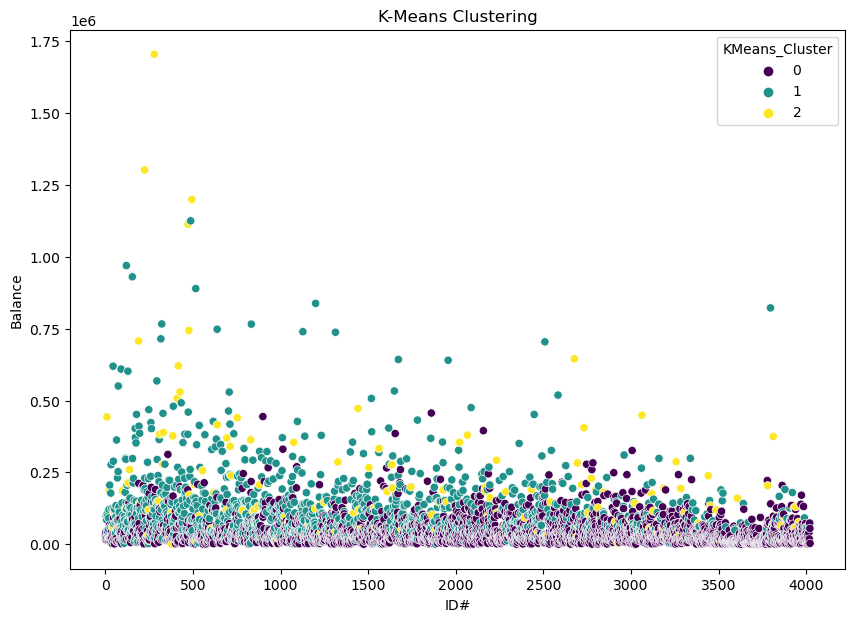

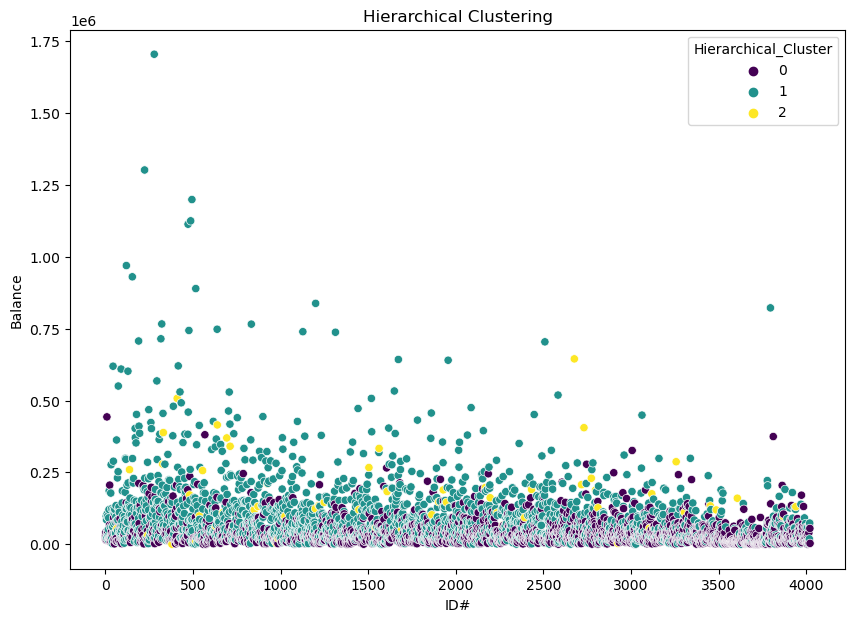

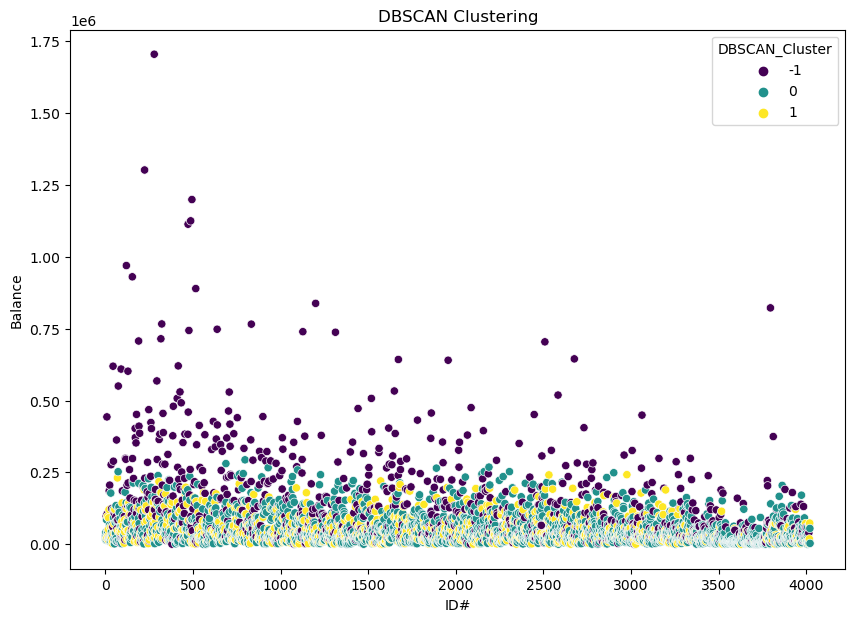

Silhouette Score for K-Means: 0.28094828366390856
Silhouette Score for Hierarchical Clustering: 0.20526614352218822
Silhouette Score for DBSCAN: 0.16551155274882765


In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'D:/Data science ass/8/Clustering/Book1.xlsx'  
df = pd.read_excel(file_path)

# Handle missing values (if any)
df.fillna(df.mean(), inplace=True)

# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Perform EDA
sns.pairplot(pd.DataFrame(df_scaled, columns=df.columns))
plt.show()

# Implement K-Means
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)  # Number of clusters chosen based on domain knowledge
kmeans_labels = kmeans.fit_predict(df_scaled)

# Implement Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')  # Using 'ward' linkage
hierarchical_labels = hierarchical.fit_predict(df_scaled)

# Implement DBSCAN
eps_values = np.arange(0.1, 1.0, 0.1)
min_samples_values = range(2, 10)

def find_optimal_dbscan(df, eps_values, min_samples_values):
    best_eps = None
    best_min_samples = None
    best_silhouette = -1

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(df)
            if len(np.unique(labels)) > 1:
                silhouette_avg = silhouette_score(df, labels)
                if silhouette_avg > best_silhouette:
                    best_silhouette = silhouette_avg
                    best_eps = eps
                    best_min_samples = min_samples

    return best_eps, best_min_samples, best_silhouette

best_eps, best_min_samples, best_silhouette = find_optimal_dbscan(df_scaled, eps_values, min_samples_values)

dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = dbscan.fit_predict(df_scaled)

# Add cluster labels to the dataframe
df['KMeans_Cluster'] = kmeans_labels
df['Hierarchical_Cluster'] = hierarchical_labels
df['DBSCAN_Cluster'] = dbscan_labels

# Analyze and interpret the clusters
print("K-Means Clusters:")
print(df.groupby('KMeans_Cluster').mean())

print("Hierarchical Clusters:")
print(df.groupby('Hierarchical_Cluster').mean())

print("DBSCAN Clusters:")
print(df.groupby('DBSCAN_Cluster').mean())

# Visualize the clustering results
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='KMeans_Cluster', palette='viridis', data=df)
plt.title('K-Means Clustering')
plt.show()

plt.figure(figsize=(10, 7))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='Hierarchical_Cluster', palette='viridis', data=df)
plt.title('Hierarchical Clustering')
plt.show()

plt.figure(figsize=(10, 7))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='DBSCAN_Cluster', palette='viridis', data=df)
plt.title('DBSCAN Clustering')
plt.show()

# Evaluate the quality of clustering
kmeans_silhouette = silhouette_score(df_scaled, kmeans_labels)
print(f'Silhouette Score for K-Means: {kmeans_silhouette}')

hierarchical_silhouette = silhouette_score(df_scaled, hierarchical_labels)
print(f'Silhouette Score for Hierarchical Clustering: {hierarchical_silhouette}')

dbscan_silhouette = silhouette_score(df_scaled, dbscan_labels)
print(f'Silhouette Score for DBSCAN: {dbscan_silhouette}')
